In [1]:
from __future__ import print_function, unicode_literals, division
import pandas as pd
import tensorflow as tf
import urllib
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
%matplotlib inline

In [ ]:
#tf.reset_default_graph()
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.01
epochs = 200
batch_size = 100
nb_batch = int(mnist.train.num_examples/batch_size)
display_step = 1
cost_history = list()
n_hidden_1= 256
n_hidden_2= 64
n_input_dim = 784
n_class = 10

In [13]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [2]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W, stride):
    return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='SAME')

def max_pool_nxn(x, size, stride):
    return tf.nn.max_pool(x, ksize=[1, size, size, 1], strides=[1, stride, stride, 1], padding='SAME')

In [21]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1, 1) + b_conv1)
h_pool1 = max_pool_nxn(h_conv1, 2, 2)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2, 1) + b_conv2)
h_pool2 = max_pool_nxn(h_conv2, 2, 2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

NameError: name 'x' is not defined

In [ ]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [44]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
            x: batch[0], y_: batch[1], keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    print('test accuracy %g' % accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.04
step 100, training accuracy 0.78
step 200, training accuracy 0.9
step 300, training accuracy 0.9
step 400, training accuracy 0.94
step 500, training accuracy 0.94
step 600, training accuracy 1
step 700, training accuracy 0.96
step 800, training accuracy 0.98
step 900, training accuracy 0.96
step 1000, training accuracy 1
step 1100, training accuracy 0.92
step 1200, training accuracy 0.92
step 1300, training accuracy 0.98
step 1400, training accuracy 1
step 1500, training accuracy 1
step 1600, training accuracy 0.98
step 1700, training accuracy 0.98
step 1800, training accuracy 0.96
step 1900, training accuracy 1
step 2000, training accuracy 0.98
step 2100, training accuracy 1
step 2200, training accuracy 0.98
step 2300, training accuracy 1
step 2400, training accuracy 0.96
step 2500, training accuracy 1
step 2600, training accuracy 0.98
step 2700, training accuracy 1
step 2800, training accuracy 1
step 2900, training accuracy 0.96
step 3000, training accu

# try function

In [ ]:
def convnet(x, weights, bias, dropout):
    x = tf.reshape(x, shape= [-1, n_pixel, n_pixel, 1])
    conv1 = conv2d(x, weights['con1_w'], bias['conv1_b'], conv_stride, 'conv1')
    tf.summary.histogram('conv1', conv1)
    pool1 = maxpool2d(conv1, pool_stride, 'pool1')
    tf.summary.histogram('pool1', pool1)
    
    conv2 = conv2d(pool1, weights['con2_w'], bias['conv2_b'], conv_stride, 'conv2')
    tf.summary.histogram('conv2', conv2)
    pool2 = maxpool2d(conv2, pool_stride, 'pool2')
    tf.summary.histogram('pool2', pool2)    
    
    fc1 = tf.reshape(pool2, shape= [-1, weights['fc1_w'].get_shape().as_list()[0]])
    fc1 = tf.nn.relu(tf.add(tf.matmul(fc1, weights['fc1_w']), bias['fc1_b']), name='fc1')
    tf.summary.histogram('fc1', fc1)
    fc1 = tf.nn.dropout(fc1, dropout)
    
    fc2 = tf.add(tf.matmal(fc1, weights['fc2_w']), bias['fc2_b'], name= 'fc2')
    tf.summary.histogram('fc2', fc2)
    return fc2
    
    

In [ ]:
with tf.name_scope('weights'):
    weights = {
        'conv1_w': tf.Variable(tf.random_normal([win1,win1, n_chan,filter1 ]), name='conv1_w'),
        'conv2_w': tf.Variable(tf.random_normal([win2,win2, filter1,filter2 ]), name='conv2_w'),
        'fc1_w': tf.Variable(tf.random_normal([fc1_in, fc1_w]), name='fc1_w'),
        'fc2_w': tf.Variable(tf.random_normal([fc1_in, n_class]), name='fc2_w')
    }

# Document Classifier

In [3]:
import scipy.misc as misc

In [4]:
bigcat = misc.imread('bigcat.jpg')
bigcat = bigcat/255
bigcat.shape

(431, 650, 3)

In [5]:
import os
dirnamr = 'HPEImages'
images = []
labels = []

for imgname in os.listdir(dirnamr):
    label = imgname.split('.')[0][:-1]
    image = misc.imread(dirnamr  + '/'+ imgname)
    resized_img = misc.imresize(image, (600, 800))
    labels.append(label)
    images.append(resized_img)

images = np.array(images)
images = images/255
labels = np.array(labels)

In [6]:
images.shape

(41, 600, 800, 3)

In [7]:
images[0].shape

(600, 800, 3)

In [8]:
from keras.utils import np_utils
def encode_one_hot(arr):
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

Using TensorFlow backend.


In [9]:
one_hot_labels = encode_one_hot(labels)

In [10]:
print (labels)
one_hot_labels.shape

[u'bg' u'bg' u'bg' u'bg' u'bg' u'bg' u'building' u'building' u'cathay'
 u'cathay' u'cathay' u'cathay' u'cathay' u'cathay' u'name' u'name' u'name'
 u'name' u'nid' u'nid' u'nid' u'nid' u'nid' u'nid' u'own' u'own' u'own'
 u'own' u'own' u'own' u'res' u'res' u'res' u'res' u'res' u'visa' u'visa'
 u'visa' u'visa' u'visa' u'visa']


(41, 8)

In [11]:
x_image = tf.placeholder(tf.float32, [None, 600, 800, 3])
y_ = tf.placeholder(tf.float32, [None, 8])

W_conv1 = weight_variable([5, 5, 3, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1, 1) + b_conv1)
h_pool1 = max_pool_nxn(h_conv1, 2, 2)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2, 1) + b_conv2)
h_pool2 = max_pool_nxn(h_conv2, 2, 2)

W_fc1 = weight_variable([150  * 200 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 150 *200 *64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
W_fc2 = weight_variable([1024, 8])
b_fc2 = bias_variable([8])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(500):
        if i%50 ==0:
            train_accuracy = accuracy.eval(feed_dict={
                x_image: images[:20, :], y_: one_hot_labels[:20, :] , keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x_image: images[:20, :], y_: one_hot_labels[:20, :] , keep_prob: 0.5})
    print('test accuracy %g' % accuracy.eval(feed_dict=
                             {x_image: images[20:, :], y_: one_hot_labels[20:, :] , keep_prob: 0.5}))

step 0, training accuracy 0.1


In [ ]:
for i in range(len(images)):
    print (images[i].shape)

In [96]:
misc.imresize(images[0], (400, 600))

array([[[224, 221, 214],
        [224, 221, 214],
        [223, 220, 213],
        ..., 
        [212, 212, 210],
        [213, 213, 211],
        [213, 213, 211]],

       [[224, 221, 214],
        [223, 220, 213],
        [222, 219, 212],
        ..., 
        [214, 214, 212],
        [215, 215, 213],
        [215, 215, 213]],

       [[223, 220, 213],
        [222, 219, 212],
        [221, 218, 211],
        ..., 
        [216, 216, 214],
        [217, 217, 215],
        [217, 217, 215]],

       ..., 
       [[225, 222, 217],
        [225, 222, 217],
        [224, 221, 216],
        ..., 
        [197, 198, 193],
        [198, 199, 194],
        [198, 199, 194]],

       [[225, 222, 217],
        [225, 222, 217],
        [224, 221, 216],
        ..., 
        [197, 198, 193],
        [197, 198, 193],
        [197, 198, 193]],

       [[225, 222, 217],
        [225, 222, 217],
        [224, 221, 216],
        ..., 
        [197, 198, 193],
        [197, 198, 193],
        [197, 198,

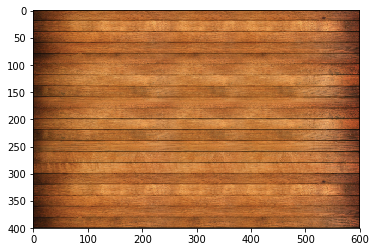

In [97]:
plt.imshow(images[4])
plt.imshow(misc.imresize(images[4], (400, 600)))

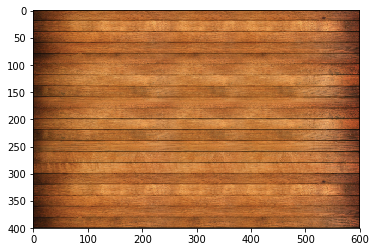

In [95]:
plt.imshow(misc.imresize(images[4], (400, 600)))